# Sobol Sequence Generation of Bridge Parameters

In [1]:
# import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#!pip3 install scikit-optimize
from skopt.space import Space
from skopt.sampler import Sobol
# from skopt.sampler import Lhs
#from skopt.sampler import Grid
# from scipy.spatial.distance import pdist

#Installation
# conda install -c conda-forge scikit-optimize

## Sampling of Birdge Parameter Combinations

To sample the input space of bridge parameter combinations the Sobol Sequences is used. Sobol0 sequences belong to the family of quasi-random sequences which are designed to generate samples of multiple parameters as uniformly as possible over the multi-dimensional parameter space (Saltelli et al., 2010). In comparison random sampling cannot guarantee a good and even spred accross the dimensions, but accumulations and gaps are often present. The biggest difference is that the quasi-random samplers use the infomration of the previously sampled points. Therefore, the an quasi-random sampler such as the Sobol Sequence is advantageous for applications where the number of sample points is limited but still a good ecploration of the input parameter space is needed. 

#### Generate Samples

In [6]:
# Define desired number of data points

#n_samples = 2**15
n_samples = 2**17

#n_samples = 2**13
#n_samples = 2**3

print(n_samples)

#set dimension ranges for the sampler
# Order: Span [m], Rise of Arch [m]; Width [m]; Hanger Spacing [m]; Alpha0 [°]; Tie and Arch CS-Depth [m], Hanger CS-Area [m^2]; h/b Box CS [-]; tw/h Box [-], tf/b Box [-]
space = Space([(20., 200.),(5., 100.),(10., 25.), (1., 40.),(10., 90.),(0.2, 3.5), (0.001, 0.01),(0.5, 2.),(0.005, 0.04),(0.01, 0.07)])

#space_2d = Space([(20., 200.),(5., 100.)])
#space_4d = Space([(20., 200.),(5., 100.),(10., 25.), (1., 40.)])
#space_6d = Space([(20., 200.),(5., 100.),(10., 25.), (1., 40.),(10., 90.),(0.2, 3.5)])

131072


In [7]:
# generate parameter combinations with Sobol Sequence

sobol = Sobol()

x = sobol.generate(space.dimensions, n_samples)
#x_2d = sobol.generate(space_2d.dimensions, n_samples)
#x_4d = sobol.generate(space_4d.dimensions, n_samples)
#x_6d = sobol.generate(space_6d.dimensions, n_samples)

#print(x[0])
#y = space.transform(x)
#print(y[0])

#x_rnd = space.rvs(n_samples)

#grid = Grid(append_border="include")
#x_grid = grid.generate(space.dimensions, n_samples)

In [13]:
#print(x[2])
x = np.array(x)

#### Plot Parameters Space

In [10]:
def plot_searchspace(x, dim1, dim2, dim1Name, dim2Name, title):
    fig, ax = plt.subplots()
    plt.plot(np.array(x)[:, dim1], np.array(x)[:, dim2], 'r+', label='samples')
    plt.plot(np.array(x)[:, dim1], np.array(x)[:, dim2], 'r+', alpha=0.5)
    # ax.legend(loc="best", numpoints=1)
    ax.set_xlabel(dim1Name)
    #ax.set_xlim([-5, 10])
    ax.set_ylabel(dim2Name)
    #ax.set_ylim([0, 15])
    plt.title(title)

In [9]:
#plot_searchspace(x,0,1,'Span [m]','Rise of Arch [m]', 'Sobol')
#plot_searchspace(x,2,3, 'Width [m]','Hanger Spacing [m]','Sobol')

#print(np.min(x_2d, axis=0))
#print(np.max(x_2d, axis=0))

[20.00458805  5.00191615]
[199.99909489  99.99901698]


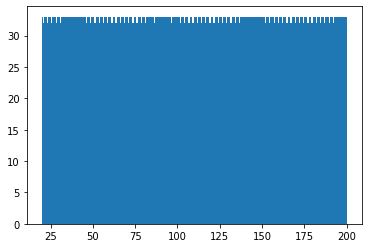

In [21]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)

x_2d_matrix = np.array(x_2d)
x_matrix = np.array(x)

#plt.hist(x_2d_matrix[:, 0], 10000)
plt.hist(x_matrix[:, 0], 1000)
plt.show()

#plot_searchspace(x_2d, 0, 1, '0', '1', 'sobol')

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

sobol = Sobol()
x = sobol.generate(space.dimensions, n_samples)
x = np.array(x)
x_proj = pca.fit_transform(x)

#x = space.rvs(n_samples)

grid = Grid(append_border="include")
x_grid = grid.generate(space.dimensions, n_samples)
x_grid = np.array(x_grid)
x_grid_proj = pca.fit_transform(x_grid)

print(x.shape)
print(x_proj.shape)
print(x_grid.shape)
print(x_grid_proj.shape)

#plt.plot(np.array(x_proj)[:, 0], np.array(x_proj)[:, 1], 'r+', label='samples')
plt.plot(np.array(x_grid_proj)[:, 0], np.array(x_grid_proj)[:, 1], 'b+', label='samples')

MemoryError: Too large sets

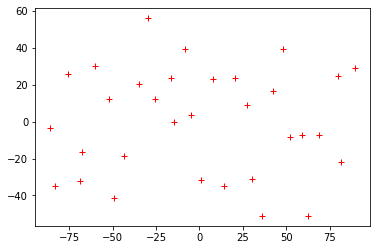

In [65]:
plt.plot(np.array(x_proj)[:, 0], np.array(x_proj)[:, 1], 'r+', label='samples')

#### Export Generated Samples

In [14]:
# save to csv file
#np.savetxt('SobolParameterSamples{}.csv'.format(n_samples), x, delimiter=',')

#np.savetxt(f'SobolParameterSamples{n_samples}_2d.csv', x_2d, delimiter=',')
#np.savetxt(f'SobolParameterSamples{n_samples}_4d.csv', x_4d, delimiter=',')
np.savetxt(f'x-10d-orig-large-{n_samples}.csv', x, delimiter=',')